<a href="https://colab.research.google.com/github/Technology-for-the-Poorest-Billion/2025-Majicom-WaterCooling/blob/main/interim/Active%20cooling%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Several options were identified as possibilities of cooling water in the tank:

- Cooling as it is dispensed with either Peltier, or a cycle
- Cooling the whole water tank with either Peltier or a cycle
- Cooling a smaller tank prior to dispensal
- Heat exchanger with the tap water

# 1. Cooling as it is dispensed:

In [2]:
time = 10 #s
c = 4200 #Heat capacity of water in J/kg/K
m = 0.5 #kg
dT = 5 #K
Energy = m*c*dT
print(f"Energy necessary to cool the water = {Energy:.0f} Joules")
Power = Energy/time
print(f"Power necessary to cool the water = {Power:.0f} Watts")


Energy necessary to cool the water = 10500 Joules
Power necessary to cool the water = 1050 Watts


1 kW of peak cooling power is a lot. However, that translates to even more electric power needed, hence the COP (efficiency) of the cooling system is of great importance. However, since the start up time required is very short, only Peltier modules would be applicable. Cycle systems require at least 2 min start up time to reach their cooling power, so they are nmot suitable for cooling on demand.

In [3]:
#Peltier efficiency
eff = 0.5 #might be optimistic, we could check
Epower = Power/eff
print(f"Peak power necessary to cool the water on demand = {Epower:.0f} Watts")

Peak power necessary to cool the water on demand = 2100 Watts


The peak power requirement is high and would require the use of several high power peltier modules. The hot side would also require some cooling system.
This power could be stored in the battery for use and be constantly recharged from the solar panels

In [4]:
#Assuming 1 user per 30 seconds
average_time = 30 #s
Average_Power = Epower*time/average_time
print(f"Average power necessary to cool the water on demand = {Average_Power:.0f} Watts")

Average power necessary to cool the water on demand = 700 Watts


This would result in large area of panels needed, but could nevertheless be possible. One other possible consideration could be the rate of heat transfer in the pipes. To allow a large temperature drop large area would be needed.

In order to check the cooling capabilities of Peltier cells, the following experimental setup is considered. A series of Peltier cells is placed in a row over a rectangular cooling channel. This geometry is chosen for its simplicity in analysis and acts as a first guess and an approximation. It aims to determine whether a simple setup without a complicated heat exchanger is possible to cool hte water.


###More detailed heat transfer analysis

In [5]:
#Physical Paramenters:
d = 0.01 #channel thickness
w = 0.062 #channel width (same as teh width of the peltier modules)
m = 0.05 #kg/s - mass flow
c = 4200 #Heat capacity of water in J/kg/K
dT = 5 #K
mu = 0.001 #dynamic viscosity
rho = 1000 #kg/m3
k = 0.603 #thermal conductivity of water

Bulk_velocity = m/(rho*d*w)
print(f"Bulk velocity = {Bulk_velocity:.3e} m/s")

Re = rho*Bulk_velocity*d/mu
print(f"Reynolds number = {Re:.0f}")




Bulk velocity = 8.065e-02 m/s
Reynolds number = 806


Low Reynolds number suggests laminar flow. It can be assumed that it is fully developed and hence given by the equation

In [6]:
import sympy as sp

u , Ub , y , d = sp.symbols('u U_b y d')
u = 2 *Ub * (1 - (y/d)**2)
u

2*U_b*(1 - y**2/d**2)

### Analysis conclusions


Having analysed the heat transfer rates in a simple rectangular channel it becomes clear that such a system would not be sufficient. This would require the use of finned heat exchanger/metal block to increase the heat transfer area and ensure high coefficiecient of performance for the Peltier cells.

Detailed analysis and theoretical predicitons of such a system would be very difficult. Hence, this is a good opportunity to test how such a sytem would behave.

Needed components:

- Peltier cell eg. TEC1 - 12710 https://www.amazon.co.uk/sourcing-map-Semiconductor-Refrigeration-Thermoelectric/dp/B0D1N1SZRW/ref=sr_1_2?crid=1WTN1QBSCC3TR&dib=eyJ2IjoiMSJ9.KpqJ4w6etAAeLvnTD_Kl0hISJ9Ia0XqjA-_FaZ83ooVDMpZUHgoQS82Jgs2UVOc2ixIcQgXOVizT_Dm9P7wtOX8znQia4cBo3H8PAuvbtR6g0XgiTxJ-K4BxZHTZ9iS3HBMQxoVKW04Ay62GPCTcRuZDq3SxPobeBQVsDdPFj3KtCpGU1uVp3J77Hp4CZ3UC0zuqTDFDBQKrdkxnjDj50SX9ngWLXRRjl25zAY1I6sALBzPvx3aH_PWCwS0Zrx3f5-QQrGWqi8DtOJwnHGthbROqA61Znbg1QdhIZndO32M.Jca8qdM9rGnkb--qYj0NgN9KBMwEvInSAAugh0LNsFM&dib_tag=se&keywords=TEC1-12715&qid=1748686539&s=industrial&sprefix=tec1-12715%2Cindustrial%2C84&sr=1-2

- Metal Heat exchanger - Water block: suitable similar products are used for CPU cooling, and hence require a similar setup
https://www.amazon.co.uk/BXQINLENX-Professional-Universal-Waterblock-Transparent/dp/B01ELC6E66/ref=pd_ci_mcx_pspc_dp_d_2_t_4?pd_rd_w=MmtAL&content-id=amzn1.sym.707a350c-f6d8-4abf-9861-74c140760f91&pf_rd_p=707a350c-f6d8-4abf-9861-74c140760f91&pf_rd_r=V1VQHSBEEHP6CBNWZJ02&pd_rd_wg=gJwU7&pd_rd_r=f50735d6-f719-4acd-b65e-1d62eeedfb8b&pd_rd_i=B01ELC6E66


- Heat sink for the hot side - radiator and fan set up
https://www.amazon.co.uk/Cooler-Master-Hyper-LGA1700-Bracket/dp/B09K7VDTXW?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&smid=A3P5ROKL5A1OLE&utm_source=chatgpt.com&th=1

- temperature sensors https://www.amazon.co.uk/Elitech-RC-5-Temperature-Reusable-Recorder/dp/B07P5YTN9G/ref=sr_1_2_sspa?crid=3USJX1P282QYL&dib=eyJ2IjoiMSJ9._dRapVvnxRBPmDUj1z-mxjC2qMkYEATqnVXHGz2wBfPrn61u9bkiQM2nGjAQbgRnG9zrqPFMTOjVnMFLNpsPYrQct1qX1CqBaAjA0CF7WP79wBPHJyLtOgGlTVuoyuIU8N7gF8B1qb6lJoZMa3XRN3v4G9w5RVl9rtOYoTVhuQYsYnV7_DWywK461ctBrtCdWXiOyxfCscvjn2vdNqe47buHbv2S2S4IqIYa7Z8DhQkUPJsGOq9UD1oq48qOD1ilt8c418V0L5SLrE-q1rZz5MErayfYzHMrrYSdXI-qxo8.jTqp_KRmGnm7iOhCOjN7wua0zd2MjY7ygSFOvpwqXZc&dib_tag=se&keywords=water%2Btemperature%2Bsensor%2Busb&qid=1748687314&s=industrial&sprefix=water%2Btemperature%2Bsensor%2Busb%2Cindustrial%2C51&sr=1-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1


- suitable connectors to inteface with all the components

https://www.amazon.co.uk/EK-Water-Blocks-EK-Tube-Black/dp/B00J6LE5FA?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A1HYUQEVEP9KPZ&utm_source=chatgpt.com

- pipe and container or a pipe/container setup:
https://www.amazon.co.uk/Reservoir-Cooling-Thread-Liquid-Systems/dp/B0BTT59TYR?source=ps-sl-shoppingads-lpcontext&ref_=fplfs&psc=1&smid=A1RUTJ6LGKEAH5&utm_source=chatgpt.com

- power supply:
https://www.amazon.co.uk/Zolt-Universal-Voltage-Household-Electronics/dp/B08L3HD4MR/ref=sr_1_2_sspa?crid=1I8GN8QIOTS07&dib=eyJ2IjoiMSJ9.3wUVZMBVK3llvBpMYG4cfWtZENcn3pixbgMGc8RrFyCVr6Xvn4pyzM3htaZf0meCGYhQCZl-LlY9EMv1Ilq9_2dFA_RCuYWZjquTqVD8GvxI3kF0Y5zOkmXHGHtwnTdAlhiRyZ1Ofc5xNZ36SqZxIC5wsQeP4wPOvTjN1G5K8LwQPljGrbGINwcF0zS8wVdmdD14ia0yn7boZ77zUO_XdXH1Itxo8DX1GGA1-Ba_FaTwt7GadIsnlVgBRu7TpK0ciE3lRnf2HXPiNBf9HBJlTJJMCa5g2XTvlP9XQntTMz4.0tSmubNomscSOlLgO-PxT80ZL6-jDcmWlyja_4wb6_U&dib_tag=se&keywords=pc+power+adapter&qid=1748692193&s=electronics&sprefix=pc+ppower+adapter%2Celectronics%2C52&sr=1-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1





# 2. Cooling the whole tank

This idea is centred on pumping the water out of the tank and passing through a cooling circuit before returning again to the container. This allows to run the cooling circuit the whole time and would make the use of not just peltier but also cycle coolers possible. However this introduces the heat losses from the tank and it may interfere with the passive cooling.

In [7]:
#Just average Power needs to be supplied
#For Peltier:
print(f"Average power necessary to cool the water using Peltier modules = {Average_Power:.0f} Watts")

#For cycle coolers:
COP = 1.5 #needs to be checked for an exact model
Cycle_power = Energy/average_time/COP
print(f"Average power necessary to cool the water using cycle coolers = {Cycle_power:.0f} Watts")


Average power necessary to cool the water using Peltier modules = 700 Watts
Average power necessary to cool the water using cycle coolers = 233 Watts


The results from this calculation suggest that a cycle cooler would allow large energy savings, however at the cost of much higher complexity.

An interesting comparison is one to a home fridge. A modern fridge uses between 350 and 500 Watts. From this angle it may seem that the system is very inefficient and power hungry. However, household fridge in normal operation uses that power just to maintain its' temperature, without constantly cooling more mass.

Another important factor is to consider the heat losses from the tank, this is done in the cell below.

In [8]:
import numpy as np
Power_aim =0.5/30 # half a litre per 30 second, keep the cold tank level constant
dT = 10 # total of 10 degree temperature drop compared to the outside
capacity = 60 * 0.001 #litres
R1 = (capacity/(2*np.pi))**(1/3)
L = 2* R1
t = 0.01 #Assume 1cm thick polystyren insulation as an example
R2 = (1+t/R1)*R1
k =  0.12
def nusselt_number(Ra_L, Pr):
    numerator = 0.387 * Ra_L**(1/6)
    denominator = (1 + (0.492 / Pr)**(9/16))**(8/27)
    Nu_L = (0.825 + numerator / denominator)**2
    return Nu_L
T_s = 273+17    # Surface temperature in K
T_inf = 273 +40  # Ambient temperature in K
L = 0.5        # Characteristic length in meters
nu = 1.5e-5    # Kinematic viscosity (m^2/s)
alpha = 2.2e-5 # Thermal diffusivity (m^2/s)
g=9.81
kair = 0.0273 #thermal conductivity of air
def rayleigh_number(L):
    # Example usage
    T_film = (T_s + T_inf) / 2  # Film temperature (K)
    beta = 1 / T_film           # Thermal expansion coefficient (1/K), ideal gas approx.
    Pr = nu / alpha             # Prandtl number
    Gr_L = abs((g * beta * (T_s - T_inf) * L**3) / (nu**2) ) # Grashof number
    Ra_L = Gr_L * Pr
    return Ra_L
Pr = nu/alpha
Ra_L = rayleigh_number(L)
Nu_L = nusselt_number(Ra_L, Pr)
print(f"Nu_L = {Nu_L:.2e}")
h = Nu_L * kair / L
print(f"h = {h:.2e}")

Rconv = 1/(h*2*np.pi*L*R2)
print(Rconv)
Rtherm = 1/(2*np.pi*k*L/np.log(R2/R1)) + Rconv
Q = dT/Rtherm
print(Q)
#When a tank is filled this is the amount of energy used to cool it
#This is much less than the heat required to cool the water in the fist place

Nu_L = 8.31e+01
h = 4.54e+00
0.3158778635012808
22.82844606357098


Heat losses were calculated to be on the order of magnitude of 10-20 Watts. This leads to the conclusion that the main part of power would be used on cooling new water rather than keeping teh water in the tank cool. This model may not be too precise in several aspects: if the tank is in the sun the temperature inside might be considerably higher and the effect of passive cooling on this is unknown. However, this is likely to have a small effect overall and the thermal losses from the tank should not be too big of a problem.

#Whole system modelling:

## Full system modelling

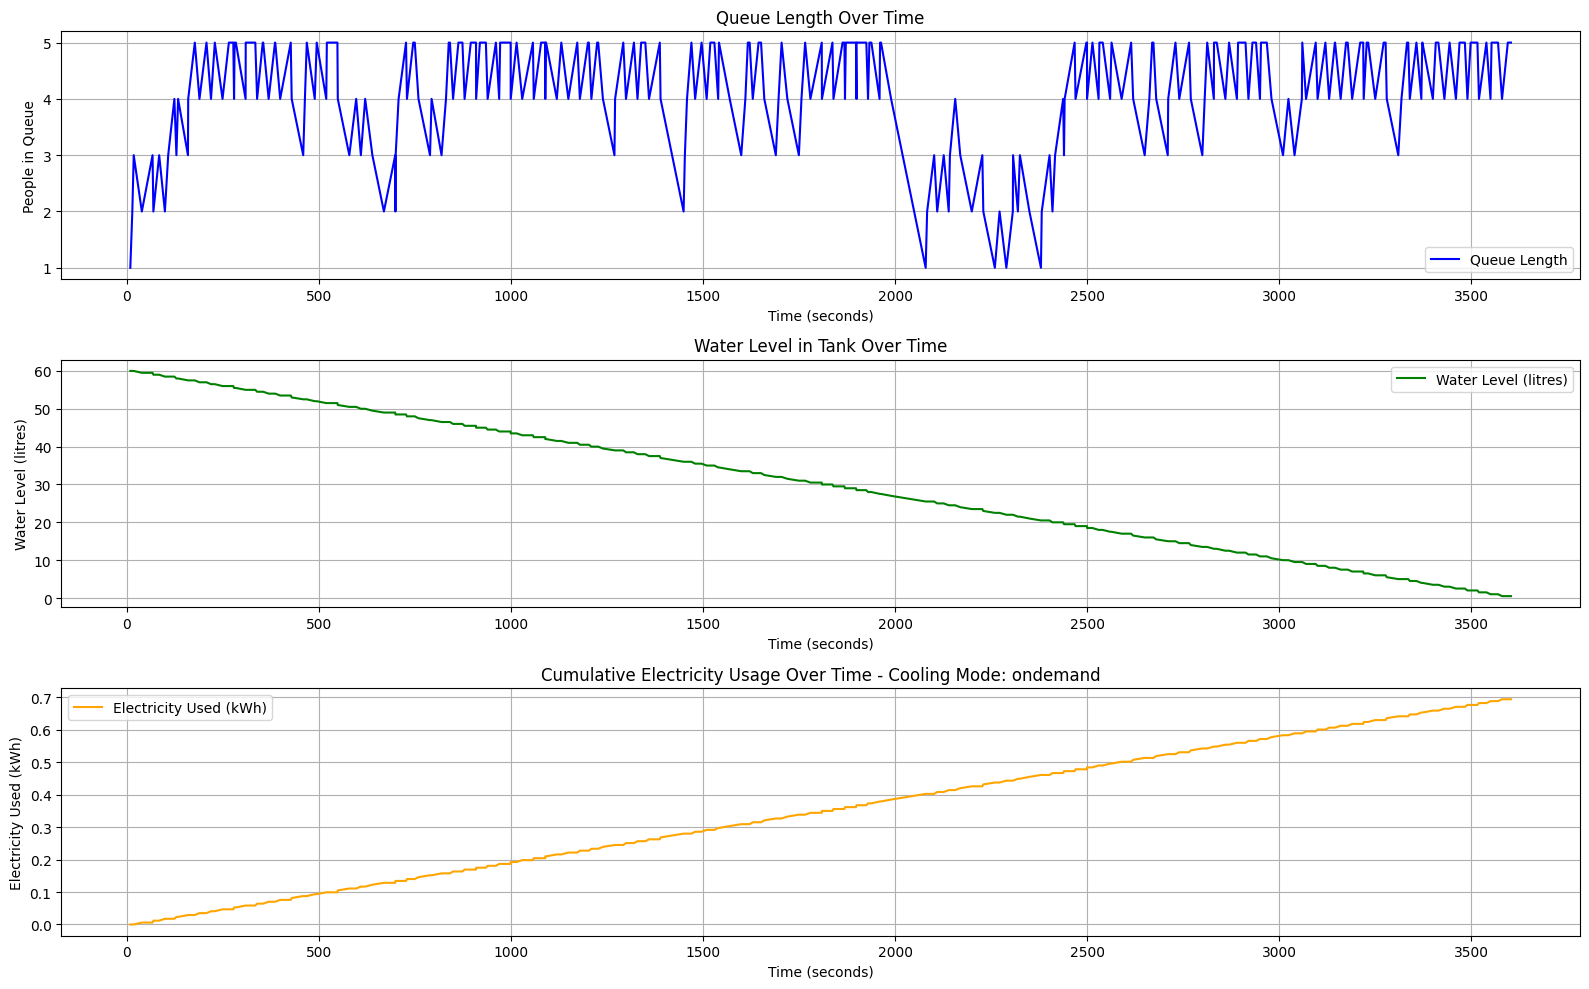

In [9]:
import random
import matplotlib.pyplot as plt

def simulate_dispenser_system(k, sim_time=3600, cooling_mode="constant", seed=41):
    random.seed(seed)

    # System Parameters
    arrival_rate = 1 / 20
    service_time = 30
    water_per_dispense = 0.5
    water_tank = 60

    # Electricity parameters
    constant_power = 250  # watts
    burst_power = 2100     # watts
    burst_duration = 10   # seconds
    total_energy_joules = 0

    # State variables
    current_time = 0
    next_arrival = random.expovariate(arrival_rate)
    next_departure = float('inf')
    people_in_system = 0
    rejected = 0

    # Logs
    queue_log = []
    water_log = []
    electricity_log = []

    while current_time < sim_time:
        if next_arrival < next_departure:
            current_time = next_arrival
            if people_in_system < k and water_tank >= water_per_dispense:
                people_in_system += 1
                if people_in_system == 1:
                    next_departure = current_time + service_time
            else:
                rejected += 1
            next_arrival = current_time + random.expovariate(arrival_rate)
        else:
            current_time = next_departure
            people_in_system -= 1
            water_tank -= water_per_dispense

            if cooling_mode == "ondemand":
                total_energy_joules += burst_power * burst_duration

            if people_in_system > 0:
                next_departure = current_time + service_time
            else:
                next_departure = float('inf')

        # Constant cooling energy update
        if cooling_mode == "constant":
            delta_t = 1 #if queue_log else current_time
            total_energy_joules = constant_power * current_time

        # Log states
        queue_log.append((current_time, people_in_system))
        water_log.append((current_time, water_tank))
        electricity_log.append((current_time, total_energy_joules / (3600 * 1000)))  # in kWh

    return queue_log, water_log, electricity_log, rejected

# --- Run Simulation ---
k = 5
sim_time = 3600
mode = 'ondemand'  # or "constant" or 'ondemand'

queue_data, water_data, electricity_data, rejected = simulate_dispenser_system(k, sim_time, cooling_mode=mode)

# --- Extract Data ---
queue_times, queue_lengths = zip(*queue_data)
water_times, water_levels = zip(*water_data)
elec_times, elec_kwh = zip(*electricity_data)

# --- Plotting ---
plt.figure(figsize=(16, 10))

# Plot 1: Queue Length
plt.subplot(3, 1, 1)
plt.plot(queue_times, queue_lengths, label='Queue Length', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('People in Queue')
plt.title('Queue Length Over Time')
plt.grid(True)
plt.legend()

# Plot 2: Water Level
plt.subplot(3, 1, 2)
plt.plot(water_times, water_levels, label='Water Level (litres)', color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Water Level (litres)')
plt.title('Water Level in Tank Over Time')
plt.grid(True)
plt.legend()

# Plot 3: Electricity Usage
plt.subplot(3, 1, 3)
plt.plot(elec_times, elec_kwh, label='Electricity Used (kWh)', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Electricity Used (kWh)')
plt.title(f'Cumulative Electricity Usage Over Time - Cooling Mode: {mode}')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Steady State Queue Distribution:
 P(1 in system) = 0.0112
 P(2 in system) = 0.0819
 P(3 in system) = 0.1204
 P(4 in system) = 0.4386
 P(5 in system) = 0.3452


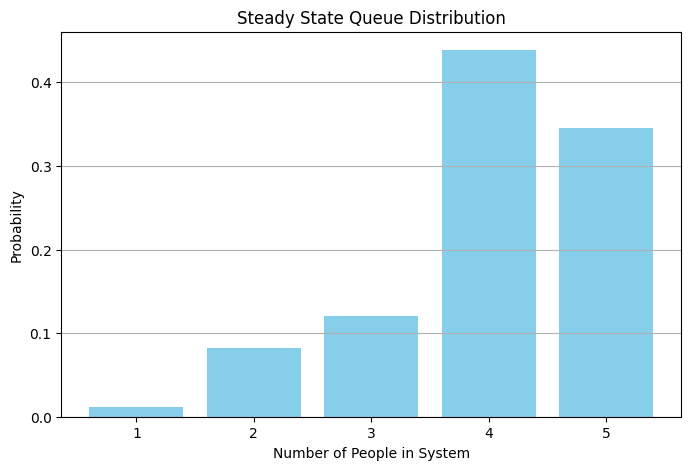

In [10]:
from collections import defaultdict

def calculate_steady_state_distribution(queue_log):
    state_durations = defaultdict(float)

    for i in range(1, len(queue_log)):
        prev_time, prev_count = queue_log[i - 1]
        curr_time, _ = queue_log[i]
        duration = curr_time - prev_time
        state_durations[prev_count] += duration

    total_time = queue_log[-1][0]
    distribution = {state: duration / total_time for state, duration in sorted(state_durations.items())}
    return distribution

# --- Calculate Steady State Distribution ---
steady_state_dist = calculate_steady_state_distribution(queue_data)

# Print distribution
print("Steady State Queue Distribution:")
for state, prob in steady_state_dist.items():
    print(f" P({state} in system) = {prob:.4f}")

# Optional: Plot steady state distribution
plt.figure(figsize=(8, 5))
plt.bar(steady_state_dist.keys(), steady_state_dist.values(), color='skyblue')
plt.xlabel('Number of People in System')
plt.ylabel('Probability')
plt.title('Steady State Queue Distribution')
plt.grid(True, axis='y')
plt.show()
